In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import yfinance as yf
import statsmodels.api as sm
%matplotlib inline

In [2]:
np.random.seed(2021)
sample = np.random.multivariate_normal(np.array([2,3,0]),np.array([[10,7,5],[7,6,4],[5,4,3]]),1200).T
xdata = sample[0,:]
ydata = sample[1,:]
zdata = sample[2,:]

In [3]:
# sample = pd.DataFrame(sample.T)
# sample.columns = ['xdata', 'ydata', 'zdata']
# print(sample.to_latex(index=True))

In [4]:
mean_vector = sample.mean(axis=1)

In [5]:
Y = sample.T - mean_vector

In [6]:
cov_matrix = np.cov(Y.T)
cov = pd.DataFrame(cov_matrix)
cov.index = ['xdata', 'ydata', 'zdata']
cov.columns = ['xdata', 'ydata', 'zdata']

In [7]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [8]:
eigen_values

array([18.53270615,  0.73384029,  0.21019128])

In [9]:
eigen_vectors

array([[ 0.73666019,  0.663357  , -0.13148863],
       [ 0.55207529, -0.70219784, -0.44958989],
       [ 0.39056963, -0.25860335,  0.8835042 ]])

In [10]:
print(round(eigen_vectors[:,0].dot(eigen_vectors[:,1]),5))
print(round(eigen_vectors[:,1].dot(eigen_vectors[:,2]),5))
print(round(eigen_vectors[:,2].dot(eigen_vectors[:,0]),5))

-0.0
0.0
0.0


In [11]:
print(round(eigen_vectors[:,2].dot(eigen_vectors[:,0]),5))
print(round(xdata.dot(zdata),5))

0.0
5986.07325


In [12]:
tickers_list = ['BTI.JO', 'SBK.JO', 'CPI.JO', 'KIO.JO', 'CL=F', '^J203.JO']
data = yf.download(tickers_list,'2016-1-1')['Adj Close']
data = data.dropna()

[*********************100%***********************]  6 of 6 completed


In [13]:
data.head()

,BTI.JO,CL=F,CPI.JO,KIO.JO,SBK.JO,^J203.JO
Date,,,,,,
2016-01-04,69973.148438,36.759998,48771.417969,2100.726562,8153.295898,49316.609375
2016-01-05,69754.625000,35.970001,48219.292969,2078.305176,8180.396484,49599.718750
2016-01-06,70328.562500,33.970001,47915.625000,1955.273926,8129.859375,49082.289062
2016-01-07,70594.898438,33.270000,47851.210938,1810.970947,7885.963867,48052.781250
2016-01-08,70735.070312,33.160000,47120.558594,1799.473022,7646.462891,48104.679688


In [14]:
rates = data.pct_change()
rates = rates.iloc[1:,:]
rates.head()

,BTI.JO,CL=F,CPI.JO,KIO.JO,SBK.JO,^J203.JO
Date,,,,,,
2016-01-05,-0.003123,-0.021491,-0.011321,-0.010673,0.003324,0.005741
2016-01-06,0.008228,-0.055602,-0.006298,-0.059198,-0.006178,-0.010432
2016-01-07,0.003787,-0.020606,-0.001344,-0.073802,-0.030000,-0.020975
2016-01-08,0.001986,-0.003306,-0.015269,-0.006349,-0.030371,0.001080
2016-01-11,0.031172,-0.052774,-0.043081,-0.070287,-0.042146,0.004532


In [15]:
mean_vector = rates.values.T.mean(axis=1)
mean_vector

array([-3.72033195e-05, -1.55474201e-03,  1.19572649e-03,  2.83327409e-03,
        6.02287316e-04,  2.93896052e-04])

In [16]:
Y = rates.values - mean_vector

In [17]:
cov = np.cov(Y.T)
var = np.var(Y.T)

In [18]:
beta = cov/var
beta = pd.DataFrame(beta)
beta

,0,1,2,3,4,5
0,0.151113,0.000423,0.002486,0.019452,-0.003819,0.025421
1,0.000423,4.558632,0.045195,0.154527,0.115581,0.063706
2,0.002486,0.045195,0.319181,0.073068,0.161098,0.074817
3,0.019452,0.154527,0.073068,0.649892,0.079749,0.090593
4,-0.003819,0.115581,0.161098,0.079749,0.255090,0.081127
5,0.025421,0.063706,0.074817,0.090593,0.081127,0.070350


In [19]:
eigen_values, eigen_vectors = np.linalg.eig(cov)

In [20]:
print("eigen values: ", eigen_values)
print('')
print("eigen vectors: ", eigen_vectors[:,0])

eigen values:  [8.85633068e-03 1.38194051e-03 8.03750179e-04 5.54103612e-05
 2.99820231e-04 2.39202144e-04]

eigen vectors:  [3.46856591e-04 9.98574623e-01 1.26618846e-02 4.05404102e-02
 2.82663046e-02 1.56770423e-02]


In [21]:
import pandas as pd
import statsmodels.regression.linear_model as lm
import statsmodels.tools.tools as ct

In [22]:
X = rates['^J203.JO']
y = rates['SBK.JO']
a = sm.add_constant(X)

In [23]:
model = sm.OLS(y, a)

In [24]:
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SBK.JO   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     815.5
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          7.12e-142
Time:                        18:57:18   Log-Likelihood:                 3688.5
No. Observations:                1410   AIC:                            -7373.
Df Residuals:                    1408   BIC:                            -7363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.559      0.577      -0.001       0.001
^J203.JO       1.1532      0.040     28.556      0.000       1.074       1.232
==============================================================================
Omnibus:                       90.153   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.742
Skew:                           0.238   Prob(JB):                     1.10e-66
Kurtosis:                       5.224   Cond. No.                         85.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
loading = eigen_vectors.T * np.sqrt(eigen_values)

In [27]:
loading = eigen_vectors.T * np.sqrt(eigen_values)
loading = pd.DataFrame(loading)
loading.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
loading.index = rates.columns
loading

,PC1,PC2,PC3,PC4,PC5,PC6
BTI.JO,0.000033,0.037121,0.000359,0.000302,0.000489,0.000242
CL=F,-0.003645,0.001893,-0.008827,-0.006577,-0.004925,-0.002988
CPI.JO,-0.001851,-0.000306,0.019545,-0.003363,0.009418,0.002414
KIO.JO,-0.017648,-0.000111,-0.002223,-0.000664,-0.004361,0.014568
SBK.JO,-0.092203,-0.000062,-0.000649,0.000435,0.001561,-0.002588
^J203.JO,-0.005166,0.000494,0.018394,0.000346,-0.012852,-0.002335


[76.10850004903038, 11.875958946495844, 6.907174398859437, 2.57656007313322, 2.0556274435444974, 0.4761790889366275]


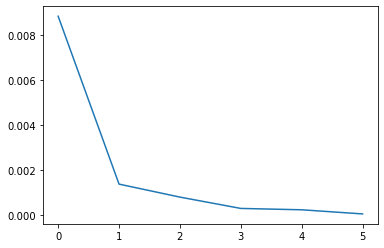

In [28]:
x = eigen_values
w = []
z = []
cnt = 0
for i in x:
    w.append(100*(i/sum(x)))
    z.append(cnt)
    cnt+=1
print(sorted(w, key=float, reverse=True))
plt.plot(z, sorted(eigen_values, key=float, reverse=True))

In [29]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(eigen_vectors[i]).argmax() for i in range(5)]

initial_feature_names = rates.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(5)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(5)}

# build the dataframe
top_features = pd.DataFrame(sorted(dic.items()))
top_features.columns = ['Component', 'Feature']
top_features

,Component,Feature
0,PC1,SBK.JO
1,PC2,BTI.JO
2,PC3,CPI.JO
3,PC4,CL=F
4,PC5,^J203.JO


[76.10850004903038, 11.875958946495844, 6.907174398859437, 2.57656007313322, 2.0556274435444974, 0.4761790889366275]


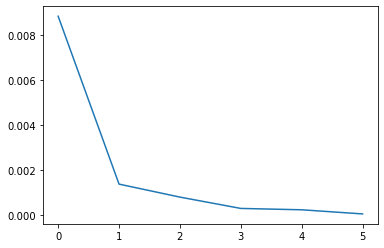

In [30]:
x = eigen_values
w = []
z = []
cnt = 0
for i in x:
    w.append(100*(i/sum(x)))
    z.append(cnt)
    cnt+=1
print(sorted(w, key=float, reverse=True))
plt.plot(z, sorted(eigen_values, key=float, reverse=True))

In [31]:
#for validation purposes
pca = PCA(n_components = 6)
X = pca.fit_transform(rates.values)

In [32]:
print(pca.components_)

[[-3.46856591e-04 -9.98574623e-01 -1.26618846e-02 -4.05404102e-02
  -2.82663046e-02 -1.56770423e-02]
 [ 3.87304496e-02 -5.09181218e-02  3.11343856e-01  8.83602050e-01
   2.84432530e-01  1.93178293e-01]
 [ 1.96738559e-02  8.24144837e-03 -6.89415068e-01  4.51738750e-01
  -5.43892409e-01 -1.56093022e-01]
 [-9.79761720e-01 -1.66802937e-03 -2.28768298e-02  5.84804909e-02
   9.01256141e-02 -1.67326764e-01]
 [-5.48926276e-02  1.32850123e-02  6.48800820e-01  4.64920973e-02
  -7.42239061e-01 -1.50955175e-01]
 [ 1.87527445e-01  2.97853148e-03  7.83944611e-02  8.91880668e-02
   2.51870499e-01 -9.41958404e-01]]


In [33]:
print(pca.explained_variance_)

[8.85633068e-03 1.38194051e-03 8.03750179e-04 2.99820231e-04
 2.39202144e-04 5.54103612e-05]
